**Keras-MNIST-CNN-Learning-Curve**  

This is a modified version using MNIST data directly from the Keras repository.  
The train test split is 60k/10k which is different from the Kaggle data (42k/28k)  
The example contains a learning curve and confusion matrix.  
Model ensembles will improve the accuracy.    

Training on GPU over 60 epochs  
Test loss: 0.030968  
Test accuracy: 0.9944  

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv']


In [3]:

"""
@author: Keras doc
https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
and fchollet
https://www.kaggle.com/fchollet/simple-deep-mlp-with-keras/code
"""

'''Trains a simple convnet on the MNIST dataset.
Original scripts gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU. (12x16s=3.2 minutes)
Geforce 1050: 11 seconds per epoch with batch size 128
Geforce 1050:  8 seconds per epoch with batch size 256
Geforce 1050:  6 seconds per epoch with batch size 512
Test loss: 0.023903
Test accuracy: 0.9923
'''

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
import matplotlib.pyplot as plt


In [ ]:
batch_size = 128 #128
num_classes = 10
epochs = 60

# input image dimensions
img_rows, img_cols = 28, 28

# Read data
train = pd.read_csv('input/train.csv')
# Use .iloc for integer-based indexing to select the first column (index 0) for labels
train_labels = train.iloc[:, 0].values.astype('int32')
x_train = (train.iloc[:, 1:].values).astype('float32')

test =  pd.read_csv('input/test.csv')
# Use .iloc for integer-based indexing to select the first column (index 0) for labels
test_labels = test.iloc[:, 0].values.astype('int32')
x_test = (test.iloc[:, 1:].values).astype('float32')

In [4]:
# 0. prepare dataset


# https://www.codesofinterest.com/2017/09/keras-image-data-format.html
# Keras image_data_format():  channels_last
from keras import backend as K
print("\n")
print("Keras image_data_format(): ",K.image_data_format())

# reshape to (42000, 28, 28, 1)
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

    # normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print("\n")

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print("\n")

'''
Keras image_data_format():  channels_last
x_train shape: (42000, 28, 28, 1)
42000 train samples
28000 test samples
'''



Keras image_data_format():  channels_last
x_train shape: (42000, 28, 28, 1)


42000 train samples
28000 test samples




'\nKeras image_data_format():  channels_last\nx_train shape: (42000, 28, 28, 1)\n42000 train samples\n28000 test samples\n'

In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(train_labels)

y_test = keras.utils.to_categorical(test_labels)


In [6]:
#取第一筆的答案來看看 one-hot encoding
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [49]:
# 1. define the model
# Built model with convolutional Layer and Dense layer and dropout
model = Sequential()
model.add(Conv2D(32, kernel_size=(8, 8),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (8, 8), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
earlystopping=[EarlyStopping(monitor='loss', patience=5, verbose=1, mode='auto')]


# 2. compile the model

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# 3. train the model
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=60,
          verbose=1,
          validation_split=0.1,
          callbacks=earlystopping)

Epoch 1/60
296/296 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.1031 - loss: 2.3085 - val_accuracy: 0.1214 - val_loss: 2.2780
Epoch 2/60
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1562 - loss: 2.2772 - val_accuracy: 0.3033 - val_loss: 2.2438
Epoch 3/60
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2457 - loss: 2.2443 - val_accuracy: 0.4290 - val_loss: 2.2029
Epoch 4/60
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3157 - loss: 2.2061 - val_accuracy: 0.4707 - val_loss: 2.1484
Epoch 5/60
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3676 - loss: 2.1548 - val_accuracy: 0.4926 - val_loss: 2.0772
Epoch 6/60
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4036 - loss: 2.0898 - val_accuracy: 0.5179 - val_loss: 1.9897
Epoch 7/60
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4392 - loss: 2.0114 - val_accuracy: 0.5500 - val_loss: 1.8849
Epoch 8/60
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4742 - loss: 1.9127 - val_accuracy: 0

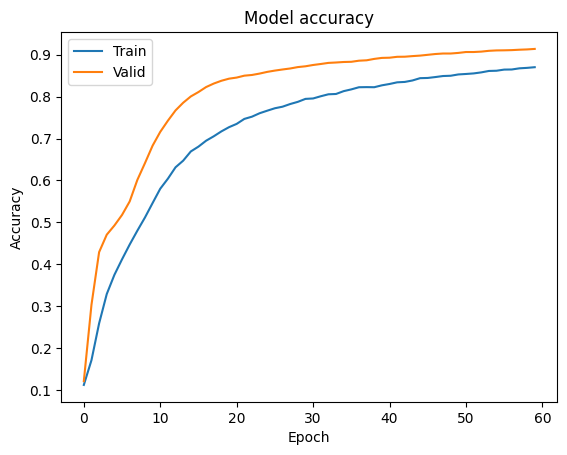

In [51]:
# prompt: plot the learing curve

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()


In [52]:
# 4. evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])



Test loss: 0.3132789134979248
Test accuracy: 0.9126428365707397


In [31]:
# 5. predict the values by model
print("Generating test predictions...")
preds = model.predict(x_test, verbose=0)

def write_preds(preds, fname):
    # Get the predicted labels (highest probability)
    predicted_labels = preds.argmax(axis=1)
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": predicted_labels}).to_csv(fname, index=False, header=True)

write_preds(preds, "keras-cnn.csv")
print("Finished prediction.")

Generating test predictions...
Finished prediction.


In [32]:
y_test[0], preds[0], y_pred[0].argmax()

(array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([1.4615592e-03, 1.9233987e-05, 9.8055226e-01, 1.1414121e-02,
        6.2393701e-05, 5.2359290e-03, 2.5419438e-05, 1.0567239e-03,
        1.6593302e-04, 6.3933439e-06], dtype=float32),
 np.int64(2))

In [53]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.argmax(axis=1) ,preds.argmax(axis=1) )
print(cm)


[[2659    1   10    3    6   20   49    8   12    0]
 [   0 3062   20   10    4    8    7    9   74    3]
 [  21   30 2409   56   97   19   34  100   42    3]
 [   5   26  252 2260    8  101    9   86   29    9]
 [  10   17    1    0 2567    1   52    3    9  113]
 [ 119   22   31  131   56 1852   68   56  171   19]
 [  39   18   18    3   57   16 2563    1   32    0]
 [  12   65   79    4   14   12    0 2607    4   97]
 [  13  173   50  121   86  125   33   49 2065   29]
 [  33   40   25   21  409   46    5  158   18 2001]]


In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test.argmax(axis=1) ,preds.argmax(axis=1) )

# 準確度

0.85875

In [55]:
from sklearn.metrics import precision_score

precision_score(y_test.argmax(axis=1) ,preds.argmax(axis=1),  average=None)

# 各類別精確度

array([0.91343181, 0.8865084 , 0.83212435, 0.86623227, 0.77693705,
       0.84181818, 0.90886525, 0.84725382, 0.84079805, 0.87994723])

In [56]:
from sklearn.metrics import recall_score

recall_score(y_test.argmax(axis=1) ,preds.argmax(axis=1),  average=None)

# 各類別recall

array([0.96062139, 0.95777291, 0.85699039, 0.81149013, 0.92571223,
       0.73346535, 0.93301784, 0.9008293 , 0.75255102, 0.72605225])

In [57]:
from sklearn.metrics import f1_score

f1_score(y_test.argmax(axis=1) ,preds.argmax(axis=1),  average=None)

# 各類別 f1-score

array([0.93643247, 0.92076379, 0.84437434, 0.83796811, 0.84482475,
       0.78391534, 0.92078319, 0.87322057, 0.79423077, 0.79562624])